# Figure E: Huron types

In [1]:
# Import 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

import sys
sys.path.append('../')
from helpers import cm2inch, title, show_num_contours, load_datasets
from melodic_contour import *
matplotlib.style.use('styles.mplstyle')

In [2]:
dfs, contours = load_datasets()

In [3]:
order = {
    'descending': 'Descencing',
    'convex': 'Convex',
    'horizontal-descending': 'Horizontal-desc',
    'descending-horizontal': 'Desc-horizontal',
    'horizontal': 'Horizontal',
    'ascending': 'Ascending',
    'concave': 'Concave',
    'horizontal-ascending': 'Horizontal-asc',
    'ascending-horizontal': 'Asc-horizontal'
}

In [4]:
dataset_ids = ['erk', 'han', 'liber-antiphons']
types = {}
for dataset_id in dataset_ids:
    dataset_contours = [Contour(pitches) for pitches in contours[dataset_id]]
    huron_optimizer = TypologyOptimizer(HuronTypology)
    best, res = huron_optimizer.optimize(dataset_contours[:1000], dict(tolerance=[0, 5]))
    H = HuronTypology(tolerance=best['tolerance'])
    types[dataset_id] = [H.classify(c) for c in dataset_contours]

/Users/bas/repos/papers/contour-typology/env/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


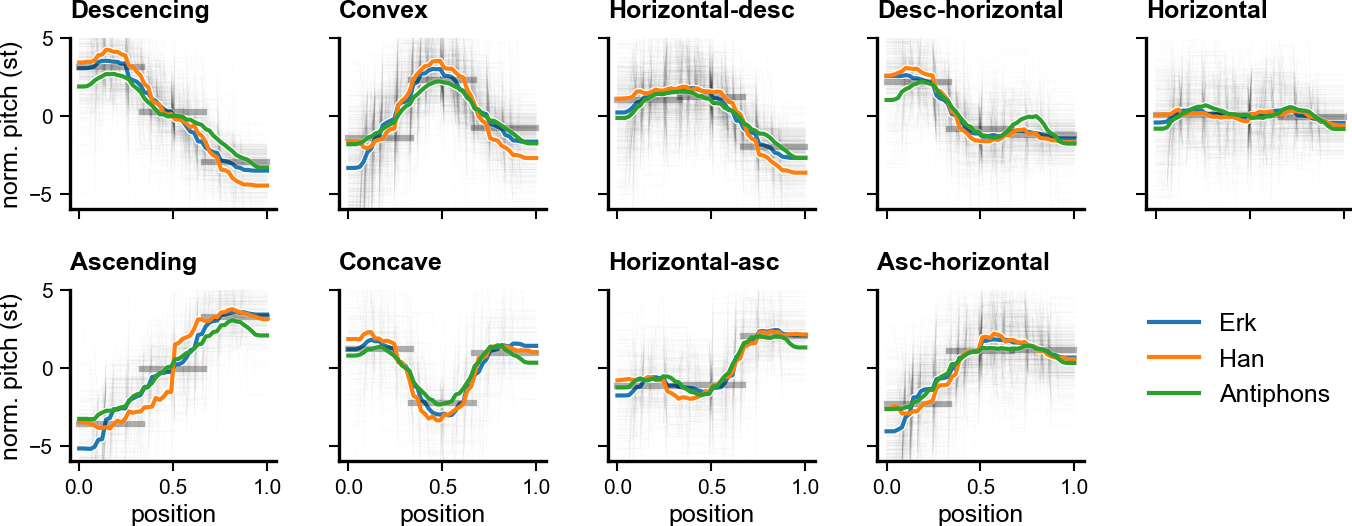

In [6]:
plt.figure(figsize=cm2inch(12,5))
colors = ['C0', 'C1', 'C2']
N=500
for i, (contour_type, abbrev) in enumerate(order.items()):
    ax = plt.subplot(int(f'25{i+1}'))
    for j, dataset_id in enumerate(dataset_ids):
        df = dfs[dataset_id]
        cont = contours[dataset_id]
        xs = np.linspace(0, 1, cont.shape[1])

        has_right_type = [t == contour_type for t in types[dataset_id]]
        subset = cont[has_right_type]
        
        plt.plot(xs, subset.mean(axis=0), lw=1.6, c='w', zorder=1)
        plt.plot(xs, subset.mean(axis=0), lw=1, c=colors[j], zorder=2)
        
        if j== 0:
            color = 'k'
            plt.plot(xs, subset[:N,:].T, '-', color=color, lw=0.2, alpha=.015, zorder=-1);
            third = subset.shape[1] // 3
            begin = subset[:, :third].mean()
            middle = subset[:, third:2*third].mean()
            end = subset[:, 2*third:].mean()
            plt.plot([0/3, 1/3], [begin, begin], '-', c=color, lw=1.5, alpha=.3)
            plt.plot([1/3, 2/3], [middle, middle], '-', c=color, lw=1.5, alpha=.3)
            plt.plot([2/3, 3/3], [end, end], '-', c=color, lw=1.5, alpha=.3)
        
    plt.title(abbrev, ha='left', x=0)
    if i != 0 and i != 5:
        plt.gca().set_yticklabels([])
    else: 
        plt.ylabel('norm. pitch (st)')
    if i< 5:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel('position')
    plt.ylim(-6,5)
    
# Add legend to final subplot
plt.subplot(2, 5, 10)
lines = [plt.Line2D([0], [0], color=c, lw=1) for c in colors]
labels = [d.replace('liber-', '').capitalize() for d in dataset_ids]
plt.axis('off')
plt.legend(lines, labels)
plt.tight_layout()

plt.savefig('../figures/figE1-huron-contour-types.pdf')